# Simple Deep Learning Classification Practice

#### 1. Load Dataset
* 데이터셋을 전처리하세요.

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [ ]:
! unzip archive-2.zip

Archive:  archive-2.zip
  inflating: seven_plastics/1_polyethylene_PET/85943598-ec9b-4da5-9221-8c32b5742e72.jpg  
  inflating: seven_plastics/1_polyethylene_PET/AORA7148.jpg  
  inflating: seven_plastics/1_polyethylene_PET/BBOZ2526.jpg  
  inflating: seven_plastics/1_polyethylene_PET/BIGI9753.jpg  
  inflating: seven_plastics/1_polyethylene_PET/FQCK7421.jpg  
  inflating: seven_plastics/1_polyethylene_PET/HSBT4561.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6263.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6268.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6269.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6271.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6272.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6308.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6328.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6336.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_63452.jpg  
  inflating: seve

In [ ]:
from PIL import Image
from glob import glob
import numpy as np
import os

label_dict = {
    "1_polyethylene_PET": 0,
    "2_high_density_polyethylene_PE-HD": 1,
    "3_polyvinylchloride_PVC": 2,
    "4_low_density_polyethylene_PE-LD": 3,
    "5_polypropylene_PP": 4,
    "6_polystyrene_PS": 5,
    "7_other_resins": 6,
    "8_no_plastic": 7,
}

label_list = []
img_list = []

for label_path in glob("./seven_plastics/*"):
    for img_path in glob(label_path + "/*"):
        # 이미지 불러와서 넘파이 어레이로 변경 후, 리스트에 추가하기 CODE HERE
        image = np.array(Image.open(img_path).convert("RGB").resize((224, 224)))
        img_list.append(image)
        # If resize needed (이미지 사이즈가 다른 경우):
        # image = np.array(Image.open(img_path).resize(28,28,3))
        label_list.append(label_dict[os.path.basename(label_path)]) # 라벨 추가하는 코드 만들기
label_list = np.array(label_list)
img_list = np.array(img_list)

In [ ]:
# Your Code Here
label_list.shape, img_list.shape

((685,), (685, 224, 224, 3))

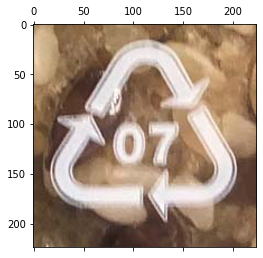

In [ ]:
import matplotlib.pyplot as plt

ex = img_list[10]

plt.matshow(img_list[10])

In [ ]:
np.bincount(label_list)
#약간의 클래스 불균형.. 2, 5번 클래스의 개수가 적다

array([121,  76,  24,  90, 192,  39,  64,  79])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(img_list, label_list, test_size=0.15, random_state=1120)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((582, 224, 224, 3), (582,), (103, 224, 224, 3), (103,))

In [ ]:
np.bincount(y_test)

array([12, 10,  1, 17, 33,  5, 10, 15])

#### 데이터 증강 example

In [ ]:
import tensorflow as tf

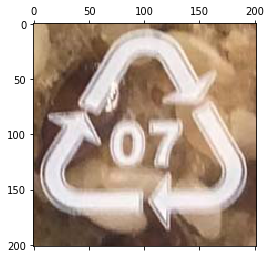

In [ ]:
#ex_ = tf.image.flip_left_right(ex)
#ex_ = tf.image.adjust_saturation(ex, 3)
#ex_ = tf.image.adjust_brightness(ex, 0.22537)
ex_ = tf.image.central_crop(ex, central_fraction=0.9)
plt.matshow(ex_)

In [ ]:
ex_.shape

TensorShape([202, 202, 3])

In [ ]:
ex_ = tf.image.resize(ex_, [224, 224])
ex_.shape

TensorShape([224, 224, 3])

In [ ]:
a, b, c, d, e = augmentation(ex)
a.shape, b.shape, c.shape, d.shape, e.shape

(TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]),
 TensorShape([208, 208, 3]))

In [ ]:
a_ = tf.reshape(a, [1,224,224,3])
a_.shape

TensorShape([1, 224, 224, 3])

In [ ]:
import random
random.uniform(0.05, 0.25)

0.06613261049787647

In [ ]:
arr = np.ones((10, 224, 224, 3))
arr = np.append(arr, np.ones((1, 224, 224, 3)), axis=0)
arr.shape

(11, 224, 224, 3)

#### 데이터 증강

In [ ]:
import numpy as np
import random
import tensorflow as tf

def augmentation(image):
  sat = np.random.randint(1, 4) #[1,4)
  bri1 = random.uniform(0.05, 0.25)
  bri2 = random.uniform(0.05, 0.25)
  #crp = random.uniform(0.9, 1)

  fl = tf.image.flip_left_right(image)
  c = tf.image.adjust_saturation(image, sat)
  b1 = tf.image.adjust_brightness(image, bri1)
  b2 = tf.image.adjust_brightness(image, bri2)
  # fr_ = tf.image.central_crop(image, central_fraction=crp)
  # fr = tf.image.resize(fr_, [224, 224]) #cropped 이미지 resizing

  return fl, c, b1, b2

In [ ]:
aug_img = X_train
aug_label = y_train

for i, img in enumerate(X_train):
  fl, c, b1, b2 = augmentation(img)
  lab = y_train[i] #원본 데이터의 라벨

  aug_img = np.append(aug_img, tf.reshape(fl, [1,224,224,3]), axis=0)
  aug_img = np.append(aug_img, tf.reshape(c, [1,224,224,3]), axis=0)
  aug_img = np.append(aug_img, tf.reshape(b1, [1,224,224,3]), axis=0)
  aug_img = np.append(aug_img, tf.reshape(b2, [1,224,224,3]), axis=0)
  #aug_img = np.append(aug_img, tf.reshape(fr, [1,224,224,3]), axis=0)

  #label_list에 증강 데이터의 라벨 추가
  aug_label = np.append(aug_label, lab)
  aug_label = np.append(aug_label, lab)
  aug_label = np.append(aug_label, lab)
  aug_label = np.append(aug_label, lab)
  #aug_label = np.append(aug_label, lab)


In [ ]:
#증강 후 데이터 개수 및 shape
aug_label.shape, aug_img.shape

((2910,), (2910, 224, 224, 3))

In [ ]:
np.bincount(y_train)

array([109,  66,  23,  73, 159,  34,  54,  64])

In [ ]:
np.bincount(aug_label)

array([545, 330, 115, 365, 795, 170, 270, 320])

#### 데이터 피클로 저장

In [ ]:
import pickle

# 데이터 저장
with open('aug_img.pkl', 'wb') as f:
    pickle.dump(aug_img, f)

with open('aug_label.pkl', 'wb') as f:
    pickle.dump(aug_label, f)

# with open('X_test.pkl', 'wb') as f:
#     pickle.dump(X_test, f)

# with open('y_test.pkl', 'wb') as f:
#     pickle.dump(y_test, f)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Working Directory 설정
import os
os.chdir('/content/drive/MyDrive')

In [ ]:
# aug: cropped까지 포함된 증강 데이터셋
# aug2: cropped 빠진 증강 데이터셋

import pickle

# 데이터 로드
with open('aug_img.pkl', 'rb') as f:
	aug_img = pickle.load(f)
 
with open('aug_label.pkl', 'rb') as f:
	aug_label = pickle.load(f)

# with open('aug_img2.pkl', 'rb') as f:
# 	aug_img2 = pickle.load(f)
 
# with open('aug_label2.pkl', 'rb') as f:
# 	aug_label2 = pickle.load(f)
 
with open('X_test.pkl', 'rb') as f:
	X_test = pickle.load(f)
 
with open('y_test.pkl', 'rb') as f:
	y_test = pickle.load(f)

In [ ]:
aug_img.shape, aug_label.shape, X_test.shape, y_test.shape
#aug_img2.shape, aug_label2.shape,

((3492, 224, 224, 3), (3492,), (103, 224, 224, 3), (103,))

In [ ]:
np.bincount(aug_label), np.bincount(y_test) 
#np.bincount(aug_label2),

(array([624, 366, 138, 462, 978, 198, 342, 384]),
 array([17, 15,  1, 13, 29,  6,  7, 15]))

#### train test split (안 돌리는 부분)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(aug_img, aug_label, test_size=0.2, random_state=1116)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2740, 224, 224, 3), (2740,), (685, 224, 224, 3), (685,))

#### 2. Build Model
* 자유롭게 사용가능한 모델을 만드세요.

#### vgg16 모델 구조 보기

In [ ]:
from torchvision import models

# VGG16 불러오기
use_pretrained = True
vgg16 = models.vgg16(pretrained=use_pretrained)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
#vgg16의 구조
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

#### custom vgg16

In [ ]:
import tensorflow as tf

In [ ]:
inp = tf.keras.layers.Input([224,224,3]) # 배치를 고려하지 않고 인풋 크기만 고려

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)
#tf.keras.layers.Dropout(rate=0.5) #데이터 개수가 많지 않으니까 일단 빼 봄
x = tf.keras.layers.Dense(4096, activation="relu")(x)
#tf.keras.layers.Dropout(rate=0.5)
out = tf.keras.layers.Dense(8, activation="softmax")(x) #8개 레이블로 분류, softmax로 확률값 추출

model = tf.keras.Model(inp, out)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 512)     14336     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 512)    0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 4096)              210124

#### custom CNN

In [ ]:
inp = tf.keras.layers.Input([224,224,3]) # 배치를 고려하지 않고 인풋 크기만 고려

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu")(x)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu")(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu")(x)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
out = tf.keras.layers.Dense(8, activation="softmax")(x) #4개 레이블로 분류, softmax로 확률값 추출

model2 = tf.keras.Model(inp, out)

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_26 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_29 (Conv2D)          (None, 106, 106, 32)      9248      
                                                           

#### resnet18(만들다가 실패)

In [ ]:
inp = tf.keras.layers.Input([224,224,3])

x = tf.keras.layers.Conv2D(filters=64, kernel_size=7, padding = 'same', strides = (2,2))(inp)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding = 'same', strides = (1,1))(inp)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding = 'same', strides = (1,1))(inp)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding = 'same', strides = (1,1))(inp)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding = 'same', strides = (1,1))(inp)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding = 'same', strides = (2,2))(inp)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding = 'same', strides = (1,1))(inp)
x = tf.keras.layers.BatchNormalization()(x)



#### 3. Train Model
* 데이터셋을 훈련하세요.

#### VGG16_aug2 train

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
sce_loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
# Your Code Here

model.compile(
    optimizer = adam,
    loss = sce_loss,
    metrics=["acc"]
)

In [ ]:
model.fit(
    aug_img, aug_label,
    epochs=100,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/100
146/146 [==============================] - 5s 33ms/step - loss: 4.2773 - acc: 0.2341 - val_loss: 1.9095 - val_acc: 0.2766
Epoch 2/100
146/146 [==============================] - 5s 31ms/step - loss: 1.8913 - acc: 0.2650 - val_loss: 1.9137 - val_acc: 0.2698
Epoch 3/100
146/146 [==============================] - 5s 31ms/step - loss: 1.8949 - acc: 0.2762 - val_loss: 2.0111 - val_acc: 0.1942
Epoch 4/100
146/146 [==============================] - 5s 31ms/step - loss: 1.8825 - acc: 0.2753 - val_loss: 1.9197 - val_acc: 0.2887
Epoch 5/100
146/146 [==============================] - 5s 31ms/step - loss: 1.8716 - acc: 0.2826 - val_loss: 1.8954 - val_acc: 0.2491
Epoch 6/100
146/146 [==============================] - 5s 31ms/step - loss: 1.8427 - acc: 0.2895 - val_loss: 1.8278 - val_acc: 0.2990
Epoch 7/100
146/146 [==============================] - 5s 31ms/step - loss: 1.8240 - acc: 0.3084 - val_loss: 1.8174 - val_acc: 0.2835
Epoch 8/100
146/146 [==============================] - 5s 31ms

In [ ]:
model.save('vgg16trained_aug2_bs16')

In [ ]:
pred = model.predict(X_test)
pred.shape # (batch, num_class)

4/4 [==============================] - 0s 22ms/step


(103, 8)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(pred, axis=1), y_test))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36        21
           1       0.50      0.62      0.56         8
           2       0.00      0.00      0.00         3
           3       0.35      0.46      0.40        13
           4       0.58      0.51      0.54        37
           5       0.20      0.25      0.22         4
           6       0.20      0.29      0.24         7
           7       0.47      0.70      0.56        10

    accuracy                           0.45       103
   macro avg       0.35      0.39      0.36       103
weighted avg       0.46      0.45      0.44       103



#### vgg16_aug train

In [ ]:
inp = tf.keras.layers.Input([224,224,3]) # 배치를 고려하지 않고 인풋 크기만 고려

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='same', activation="relu")(inp)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)
#x = tf.keras.layers.Dropout(rate=0.3)(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)
#x = tf.keras.layers.Dropout(rate=0.5)(x) #데이터 개수가 많지 않으니까 일단 빼 봄
out = tf.keras.layers.Dense(8, activation="softmax")(x) #8개 레이블로 분류, softmax로 확률값 추출

model3 = tf.keras.Model(inp, out)

In [ ]:
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_64 (Conv2D)          (None, 224, 224, 512)     14336     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 112, 112, 512)    0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_4   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 4096)              2101

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
sce_loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
model3.compile(
    optimizer = adam,
    loss = sce_loss,
    metrics=["acc"]
)

In [ ]:
model3.fit(
    aug_img, aug_label,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/50
88/88 [==============================] - 7s 71ms/step - loss: 6.5261 - acc: 0.2614 - val_loss: 1.9092 - val_acc: 0.1788
Epoch 2/50
88/88 [==============================] - 6s 64ms/step - loss: 1.8630 - acc: 0.2997 - val_loss: 1.8067 - val_acc: 0.3004
Epoch 3/50
88/88 [==============================] - 6s 64ms/step - loss: 1.8365 - acc: 0.3126 - val_loss: 1.8643 - val_acc: 0.2890
Epoch 4/50
88/88 [==============================] - 6s 64ms/step - loss: 1.8104 - acc: 0.3115 - val_loss: 1.8811 - val_acc: 0.2690
Epoch 5/50
88/88 [==============================] - 6s 64ms/step - loss: 1.7968 - acc: 0.3165 - val_loss: 1.8233 - val_acc: 0.2489
Epoch 6/50
88/88 [==============================] - 6s 64ms/step - loss: 1.7846 - acc: 0.3294 - val_loss: 1.8559 - val_acc: 0.2675
Epoch 7/50
88/88 [==============================] - 6s 64ms/step - loss: 1.7635 - acc: 0.3298 - val_loss: 1.8238 - val_acc: 0.2761
Epoch 8/50
88/88 [==============================] - 6s 64ms/step - loss: 1.7790 - a

In [ ]:
model3.save('vgg16trained_aug_bs32')

In [ ]:
pred = model3.predict(X_test)
pred.shape # (batch, num_class)

4/4 [==============================] - 0s 22ms/step


(103, 8)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(pred, axis=1), y_test))

              precision    recall  f1-score   support

           0       0.24      0.24      0.24        17
           1       0.33      0.29      0.31        17
           2       0.00      0.00      0.00         3
           3       0.23      0.25      0.24        12
           4       0.28      0.26      0.27        31
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         5
           7       0.47      0.70      0.56        10

    accuracy                           0.26       103
   macro avg       0.19      0.22      0.20       103
weighted avg       0.25      0.26      0.25       103



#### model2 train

In [ ]:
model2.compile(
    optimizer = adam,
    loss = sce_loss,
    metrics=["acc"]
)

In [ ]:
model2.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/20
31/31 [==============================] - 4s 74ms/step - loss: 113.7734 - acc: 0.1890 - val_loss: 2.0721 - val_acc: 0.2419
Epoch 2/20
31/31 [==============================] - 1s 45ms/step - loss: 2.0508 - acc: 0.2907 - val_loss: 2.0509 - val_acc: 0.2419
Epoch 3/20
31/31 [==============================] - 1s 44ms/step - loss: 2.0458 - acc: 0.2907 - val_loss: 2.0348 - val_acc: 0.2419
Epoch 4/20
31/31 [==============================] - 1s 44ms/step - loss: 2.0013 - acc: 0.2866 - val_loss: 2.0225 - val_acc: 0.2419
Epoch 5/20
31/31 [==============================] - 1s 45ms/step - loss: 1.9802 - acc: 0.2866 - val_loss: 2.0127 - val_acc: 0.2419
Epoch 6/20
31/31 [==============================] - 1s 44ms/step - loss: 1.9424 - acc: 0.2947 - val_loss: 1.9985 - val_acc: 0.2419
Epoch 7/20
31/31 [==============================] - 1s 45ms/step - loss: 1.8833 - acc: 0.3130 - val_loss: 1.9773 - val_acc: 0.2661
Epoch 8/20
31/31 [==============================] - 1s 45ms/step - loss: 1.8202 -

In [ ]:
pred = model2.predict(X_test)
pred.shape # (batch, num_class)

3/3 [==============================] - 1s 92ms/step


(69, 8)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(pred, axis=1), y_test))

              precision    recall  f1-score   support

           0       0.32      0.30      0.31        27
           1       0.13      0.50      0.21         4
           2       0.00      0.00      0.00         0
           3       0.50      0.26      0.34        27
           4       0.45      0.38      0.41        47
           5       0.11      0.33      0.17         3
           6       0.00      0.00      0.00         1
           7       0.71      0.43      0.53        28

    accuracy                           0.35       137
   macro avg       0.28      0.28      0.25       137
weighted avg       0.47      0.35      0.39       137



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
